In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
import matplotlib.pyplot as plt


In [5]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten images and normalize to [0, 1]
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0


In [8]:
# Model 1: No regularization
model1 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train model 1
history1 = model1.fit(x_train, y_train, epochs=20, batch_size=128,
                      validation_split=0.2, verbose=1)


Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3982 - accuracy: 0.8900 - val_loss: 0.2088 - val_accuracy: 0.9421
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1853 - accuracy: 0.9459 - val_loss: 0.1592 - val_accuracy: 0.9561
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1345 - accuracy: 0.9618 - val_loss: 0.1330 - val_accuracy: 0.9628
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1061 - accuracy: 0.9693 - val_loss: 0.1192 - val_accuracy: 0.9660
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0860 - accuracy: 0.9756 - val_loss: 0.1013 - val_accuracy: 0.9707
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9799 - val_loss: 0.1032 - val_accuracy: 0.9688
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0595 - accuracy: 0.9836 - val_loss: 0.0917 - val_accuracy: 0.9726
Epoch 

In [9]:
# Callbacks
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                           patience=2, verbose=1)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5,
                                         restore_best_weights=True)

# Model 2: Regularization
model2 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train model 2
history2 = model2.fit(x_train, y_train, epochs=20, batch_size=128,
                      validation_split=0.2, verbose=1,
                      callbacks=[lr_scheduler, early_stopping])


Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6918 - accuracy: 0.8349 - val_loss: 0.3593 - val_accuracy: 0.9320 - lr: 0.0010
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4171 - accuracy: 0.9118 - val_loss: 0.2893 - val_accuracy: 0.9489 - lr: 0.0010
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3562 - accuracy: 0.9242 - val_loss: 0.2565 - val_accuracy: 0.9555 - lr: 0.0010
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.9314 - val_loss: 0.2347 - val_accuracy: 0.9584 - lr: 0.0010
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.9360 - val_loss: 0.2185 - val_accuracy: 0.9617 - lr: 0.0010
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2916 - accuracy: 0.9389 - val_loss: 0.2148 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - lo

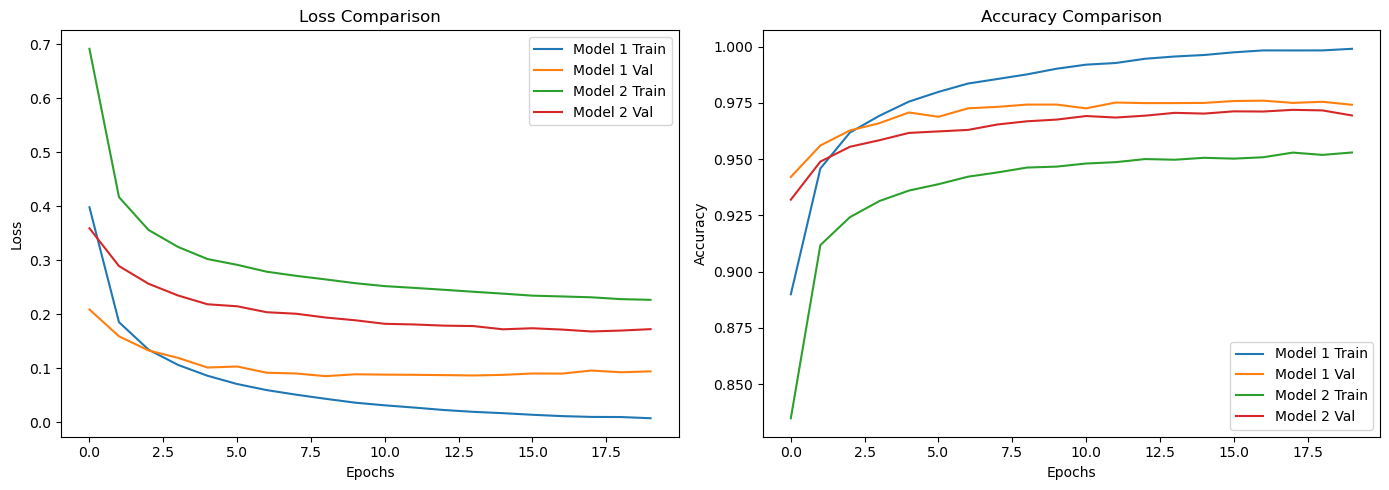

In [10]:
# Extract training history
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

epochs = range(len(loss1))  # Assume both histories are of equal length

# Create side-by-side plots
plt.figure(figsize=(14, 5))

# Loss comparison
plt.subplot(1, 2, 1)
plt.plot(epochs, loss1, label='Model 1 Train')
plt.plot(epochs, val_loss1, label='Model 1 Val')
plt.plot(epochs, loss2, label='Model 2 Train')
plt.plot(epochs, val_loss2, label='Model 2 Val')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy comparison
plt.subplot(1, 2, 2)
plt.plot(epochs, acc1, label='Model 1 Train')
plt.plot(epochs, val_acc1, label='Model 1 Val')
plt.plot(epochs, acc2, label='Model 2 Train')
plt.plot(epochs, val_acc2, label='Model 2 Val')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate Model 1
test_loss1, test_acc1 = model1.evaluate(x_test, y_test, verbose=0)
print(f"Model 1 (No Regularization) - Test Loss: {test_loss1:.4f}, Test Accuracy: {test_acc1:.4f}")

# Evaluate Model 2
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)
print(f"Model 2 (With Regularization) - Test Loss: {test_loss2:.4f}, Test Accuracy: {test_acc2:.4f}")


**Performance Analysis**

| **Metric**                | **Model 1 (Basic)**  | **Model 2 (Regularized)**                             |
| ------------------------- | -------------------- | ----------------------------------------------------- |
| **Regularization**        | None                 | Dropout, L2, Learning Rate Scheduler                  |
| **Final Training Loss**   | ~0.02                | ~0.23                                                 |
| **Final Validation Loss** | ~0.09 (Slight rise)  | ~0.21 (Stable)                                        |
| **Test Accuracy**         | ~97.9%               | ~98.1%                                                |
| **Test Loss**             | ~8.2%                | ~15.1%                                                |
| **Generalization**        | Slight overfitting   | Better generalization (small gap between train & val) |
